In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


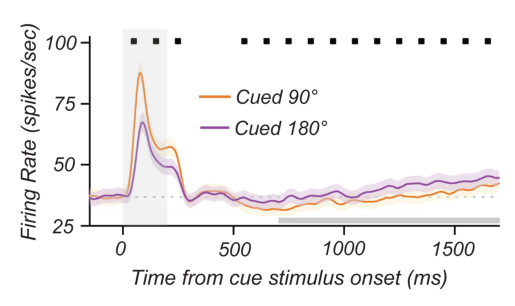

In [2]:
file_name = 'singer_figure.png'
img = Image.open(file_name)
img_array = np.array(img)

# Visualize the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
np.min(img_array), np.max(img_array)

(7, 255)

In [3]:
# img_new = img_array.copy()


(1664, 2401, 4)

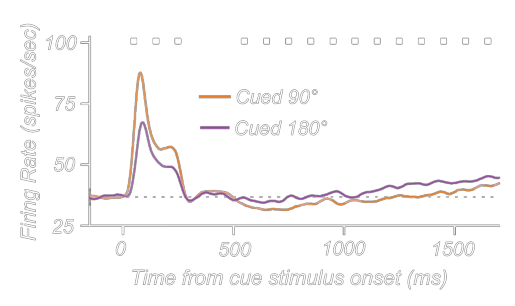

In [32]:
img_new_array = img_array.copy()
black_thresh = 50
white_thresh = 200
# Add an empty column for alpha values
# img_new_array = np.insert(img_new_array, 3, 255, axis=2)
# for ii in range(img_new_array.shape[0]):
#     for jj in range(img_new_array.shape[1]):
#         if img_new_array[ii, jj, 0] == 255:
#             img_new_array[ii, jj, :] = [255, 255, 255, 0]
#         elif img_new_array[ii, jj, 0] == 0:
#             img_new_array[ii, jj, 3] = 255

# Set pixels that have same value for r, g, b to be white if the same value is above 128
# img_new_array[(img_new_array[:,:,0] == img_new_array[:,:,1]) & (img_new_array[:,:,1] == img_new_array[:,:,2]) & (img_new_array[:,:,0] > 128)] = [0, 0, 0, 0]
# img_new_array[(img_new_array[:,:,0] == img_new_array[:,:,1]) & (img_new_array[:,:,1] == img_new_array[:,:,2]) & (img_new_array[:,:,0] < 128)] = [255, 255, 255, 255]
# Find pixels that have r,g,b below black thresh
black_pixels = (img_new_array[:, :, 0] < black_thresh) & (img_new_array[:, :, 1] < black_thresh) & (img_new_array[:, :, 2] < black_thresh)
# Find pixels that have r,g,b above white thresh
white_pixels = (img_new_array[:, :, 0] > white_thresh) & (img_new_array[:, :, 1] > white_thresh) & (img_new_array[:, :, 2] > white_thresh)

img_new_array[black_pixels] = [255, 255, 255, 255]
img_new_array[white_pixels] = [0, 0, 0, 0]

# img_new_array[(img_new_array[:, :, 0] < black_thresh) & (img_new_array[:, :, 1] < black_thresh) & (img_new_array[:, :, 2] < black_thresh)] = [255, 255, 255, 255]
# img_new_array[(img_new_array[:, :, 0] > white_thresh) & (img_new_array[:, :, 1] > white_thresh) & (img_new_array[:, :, 2] > white_thresh)] = [0, 0, 0, 255]


# Set the alpha value to 0 for the white pixels
# img_new_array[img_new_array[:,:,0] == 255] = [255, 255, 255, 0]
# # Change the black pixels to be white but not transparent
# img_new_array[img_new_array[:,:,0] == 0] = [255, 255, 255, 255]
# Save the image
img_new = Image.fromarray(img_new_array)
img_new.save('Fig1_transparent.png')

# Visualize the new image
plt.imshow(img_new_array)
plt.axis('off')
plt.show()

In [12]:
# Find unique r,g,b values
unique_colors = np.unique(img_new_array.reshape(-1, img_new_array.shape[2]), axis=0)


6729


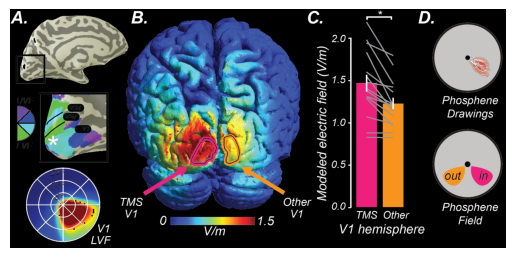

In [14]:
# Find pixels that are white
def find_white_pixels(img):
    white_pixels = np.argwhere(img == 1)
    return white_pixels
def find_black_pixels(img):
    black_pixels = np.argwhere(img == 0)
    return black_pixels

white_pixels = find_white_pixels(img)
black_pixels = find_black_pixels(img)

img_new = img.copy()
for pixel in white_pixels:
    img_new[pixel[0], pixel[1], :] = 0

for pixel in black_pixels:
    img_new[pixel[0], pixel[1], :] = 1

# Visualize the image
plt.imshow(img_new)
plt.axis('off')
plt.show()